### Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

### Loading dataset

In [3]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### PCA Digits

In [3]:
standardized_data = StandardScaler().fit_transform(data)
# initializing the pca
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (1797, 3)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


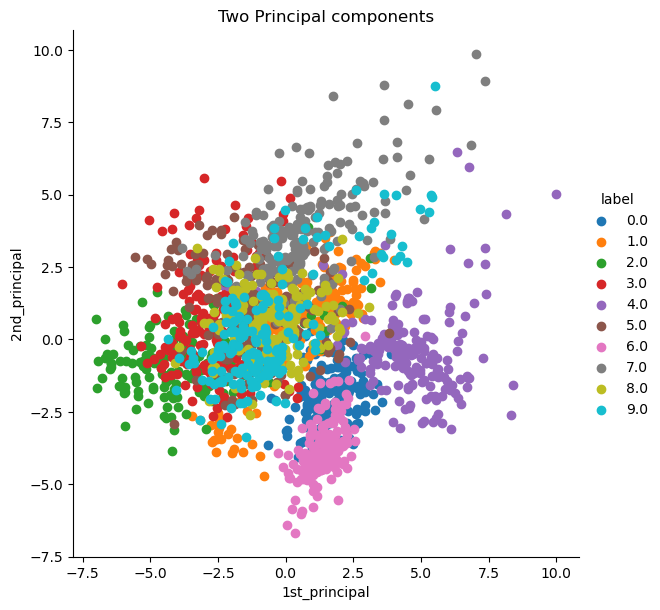

In [4]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two Principal components")
plt.show()

Create the clusters

In [5]:
median=pca_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [6]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=10,init=init_centers).fit(pca_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_


c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


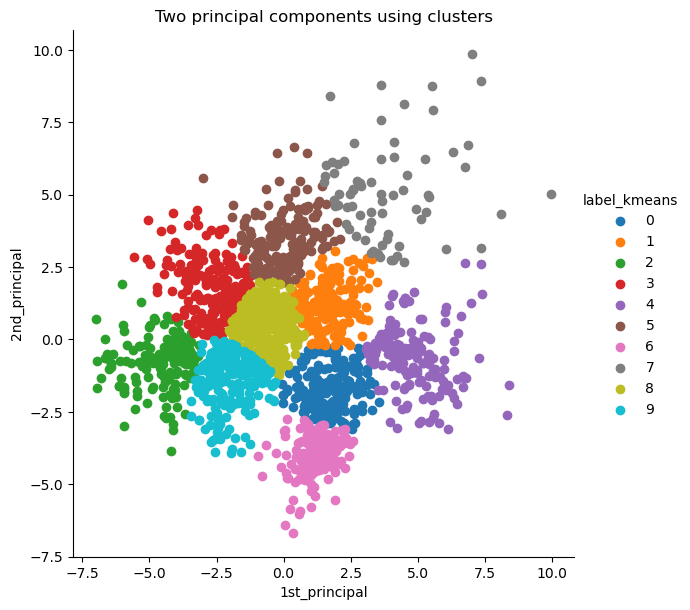

In [7]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(pca_df[["1st_principal", "2nd_principal"]])


pca_df['label_kmeans'] = labels
sn.FacetGrid(pca_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [8]:
pca_df['matches']=(pca_df['label_kmeans']==pca_df["label"])*1
total_matches=pca_df["matches"].sum()
print("Accuracy:",(total_matches/len(pca_df))*100 )

Accuracy: 49.08180300500835


### MSD Digits

In [9]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)

In [10]:
standardized_data = MinMaxScaler().fit_transform(data)
embedding = MDS(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, labels)).T

c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


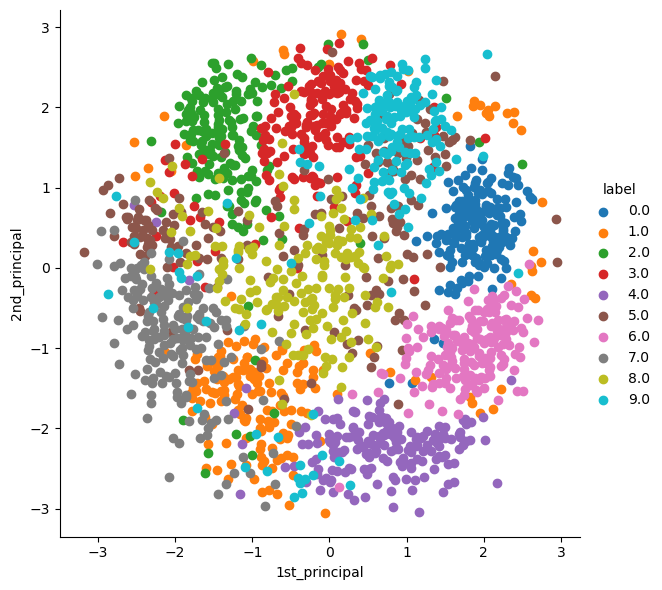

In [11]:
mds_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(mds_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Create clusters

In [12]:
median=mds_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [13]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=10,init=init_centers).fit(mds_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


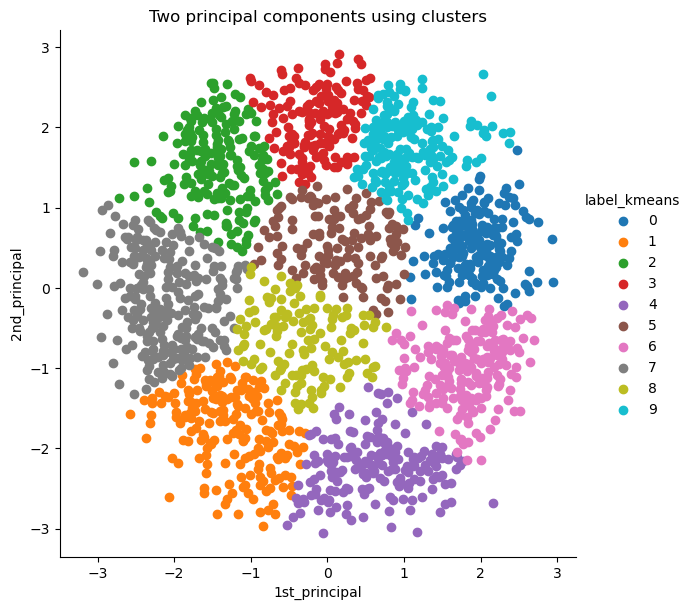

In [14]:
#%% Etiquetamos nuestro dataframe.
labels_mds = kmeans.predict(mds_df[["1st_principal", "2nd_principal"]])


mds_df['label_kmeans'] = labels_mds
sn.FacetGrid(mds_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [15]:
mds_df['matches']=(mds_df['label_kmeans']==mds_df["label"])*1
total_matches=mds_df["matches"].sum()
print("Accuracy:",(total_matches/len(mds_df))*100 )

Accuracy: 67.9465776293823


### TSNE

In [16]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)
standardized_data = MinMaxScaler().fit_transform(data)
#(1797, 64)
embedding = TSNE(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, labels)).T

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


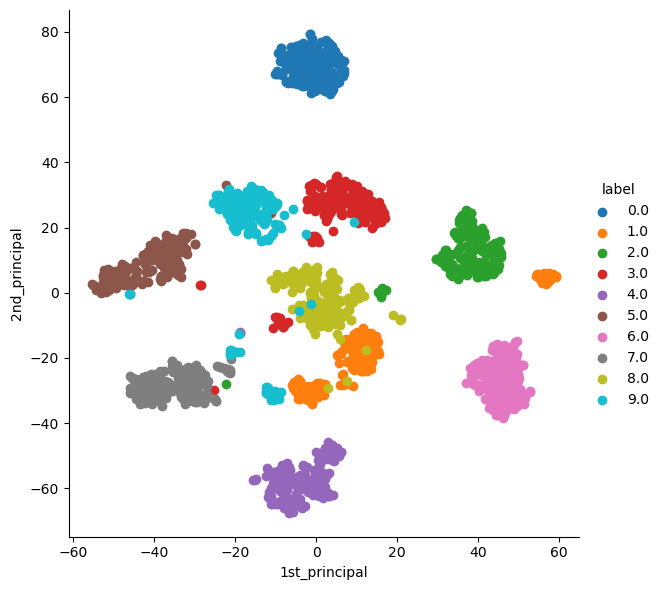

In [17]:
tsne_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Create clusters

In [18]:
median=tsne_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [19]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=10,init=init_centers).fit(tsne_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


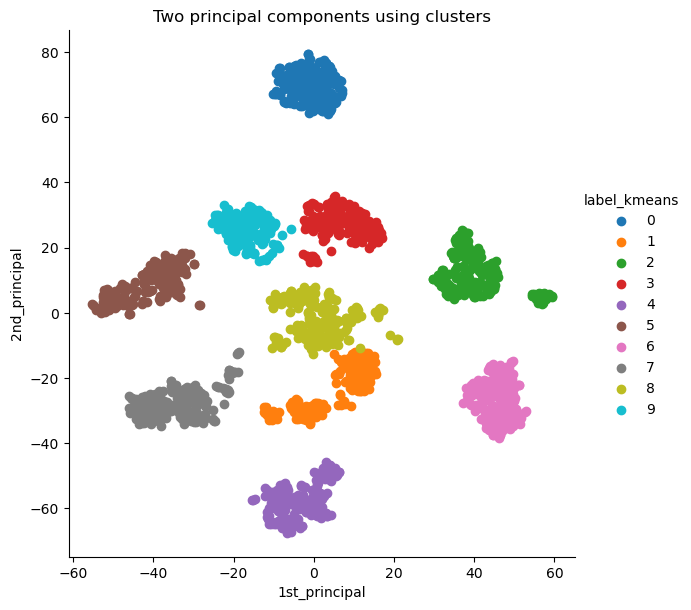

In [20]:
#%% Etiquetamos nuestro dataframe.
labels_tsne = kmeans.predict(tsne_df[["1st_principal", "2nd_principal"]])
tsne_df['label_kmeans'] = labels_tsne
sn.FacetGrid(tsne_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [21]:
tsne_df['matches']=(tsne_df['label_kmeans']==tsne_df["label"])*1
total_matches=tsne_df["matches"].sum()
print("Accuracy:",(total_matches/len(tsne_df))*100 )

Accuracy: 94.32387312186978
